In [1]:
########    Delivery Time Prediction Assignment Problem #############
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
x=pd.read_csv('delivery_time.csv')
x

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
x.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

In [3]:
x.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
import seaborn as sns

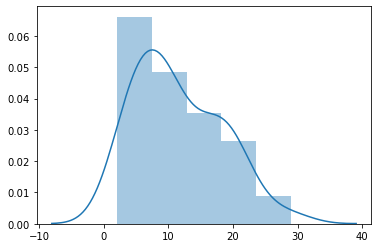

In [5]:
sns.distplot(x)

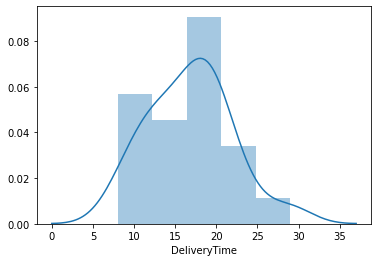

In [6]:
sns.distplot(x['DeliveryTime'])

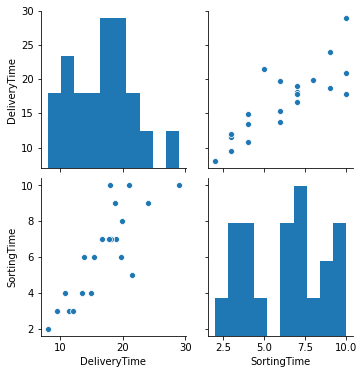

In [7]:
sns.pairplot(x)

In [8]:
x.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


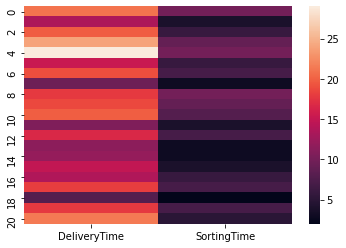

In [9]:
sns.heatmap(x)

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


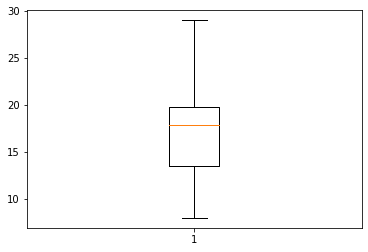

In [10]:
plt.boxplot(x.DeliveryTime)
x.describe()

{'whiskers': [<matplotlib.lines.Line2D at 0x135203f5130>,
 'caps': [<matplotlib.lines.Line2D at 0x135203f5820>,
 'boxes': [<matplotlib.lines.Line2D at 0x135203e6d90>],
 'medians': [<matplotlib.lines.Line2D at 0x135203f5ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x135203fd220>],
 'means': []}

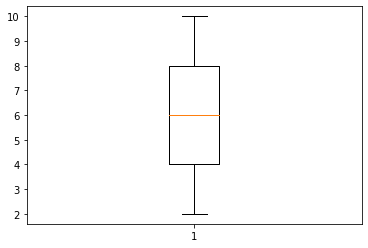

In [11]:
plt.boxplot(x.SortingTime)

In [12]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=x).fit()
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        17:29:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
pred=model.predict(pd.DataFrame(x['SortingTime']))

In [15]:
rmse_lin = np.sqrt(np.mean((np.array(x['SortingTime'])-np.array(pred))**2))
rmse_lin 

10.722052392104557

In [16]:
model2 = smf.ols('DeliveryTime~np.log(SortingTime)',data=x).fit()
model2.params

Intercept              1.159684
np.log(SortingTime)    9.043413
dtype: float64

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.64e-06
Time:                        17:30:19   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
pred2 = model2.predict(pd.DataFrame(x['SortingTime']))

In [19]:
pred2
rmse_log = np.sqrt(np.mean((np.array(x['SortingTime'])-np.array(pred2))**2))
rmse_log 

10.749542066249484

In [20]:
model3 = smf.ols('np.log(SortingTime)~DeliveryTime',data=x).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Tue, 05 Oct 2021   Prob (F-statistic):           2.64e-06
Time:                         17:30:55   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
x["SortingTime_sq"] = x.SortingTime*x.SortingTime
x

,DeliveryTime,SortingTime,SortingTime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [22]:
model_quad = smf.ols("np.log(DeliveryTime)~SortingTime+SortingTime_sq",data=x).fit()
model_quad.params

Intercept         1.699704
SortingTime       0.265922
SortingTime_sq   -0.012841
dtype: float64

In [23]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Tue, 05 Oct 2021   Prob (F-statistic):           2.20e-06
Time:                          17:32:32   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model_quad2 = smf.ols("DeliveryTime~SortingTime+SortingTime_sq",data=x).fit()
model_quad2.params

Intercept         3.522234
SortingTime       2.813002
SortingTime_sq   -0.093198
dtype: float64

In [25]:
model_quad2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.39e-05
Time:                        17:32:56   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5222      4.160      0.847      0.408      -5.217      12.261
SortingTime        2.8130      1.461      1.926      0.070      -0.256       5.882
SortingTime_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model_quad3 = smf.ols("DeliveryTime~SortingTime_sq",data=x).fit()
model_quad3.params

Intercept         11.237205
SortingTime_sq     0.124870
dtype: float64

In [27]:
model_quad3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.74e-05
Time:                        17:33:19   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2372      1.196      9.399      0.000       8.735      13.740
SortingTime_sq     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model_quad4 = smf.ols("np.log(SortingTime)~DeliveryTime+SortingTime_sq",data=x).fit()
model_quad4.params

Intercept         0.853736
DeliveryTime      0.024704
SortingTime_sq    0.010341
dtype: float64

In [29]:
model_quad4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.883
Model:                             OLS   Adj. R-squared:                  0.870
Method:                  Least Squares   F-statistic:                     68.17
Date:                 Tue, 05 Oct 2021   Prob (F-statistic):           3.99e-09
Time:                         17:33:41   Log-Likelihood:                 9.2232
No. Observations:                   21   AIC:                            -12.45
Df Residuals:                       18   BIC:                            -9.313
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8537      0.151      5.646      0.000       0.536       1.171
DeliveryTime       0.0247      0.012      2.024      0.058      -0.001       0.050
SortingTime_sq     0.0103      0.002      5.386      0.000       0.006       0.014
==============================================================================
Omnibus:                        4.025   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                2.504
Skew:                          -0.835   Prob(JB):                        0.286
Kurtosis:                       3.271   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_linear+quad","rmse_quad"]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared,model_quad4.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,Rsquare
0,rmse_lin,0.682271
1,rmse_log,0.695443
2,rmse_exp,0.695443
3,rmse_linear+quad,0.764867
4,rmse_quad,0.883378


Text(0, 0.5, 'Standardized Residual')

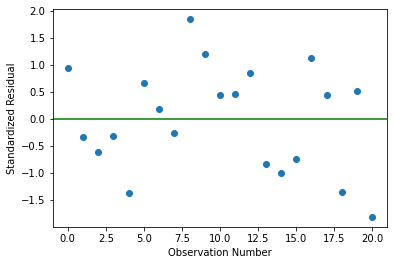

In [31]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <a list of 10 Patch objects>)

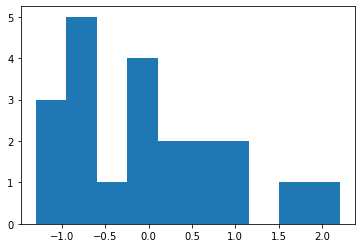

In [32]:
plt.hist(model_quad.resid_pearson)

In [33]:
model.resid 
model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

(array([1., 1., 0., 0., 4., 3., 2., 3., 4., 3.]),
 array([-2.3720146 , -2.00061689, -1.62921918, -1.25782146, -0.88642375,
        -0.51502604, -0.14362832,  0.22776939,  0.5991671 ,  0.97056481,
         1.34196253]),
 <a list of 10 Patch objects>)

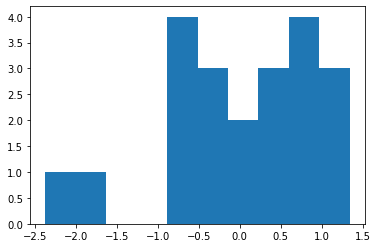

In [34]:
plt.hist(model_quad4.resid_pearson)

{'whiskers': [<matplotlib.lines.Line2D at 0x13522847550>,
 'caps': [<matplotlib.lines.Line2D at 0x13522847c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x135228471f0>],
 'medians': [<matplotlib.lines.Line2D at 0x13522850310>],
 'fliers': [<matplotlib.lines.Line2D at 0x13522850610>],
 'means': []}

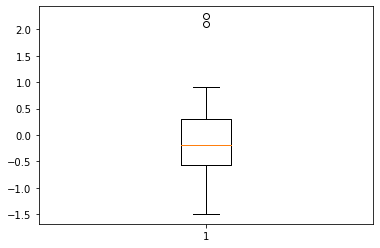

In [35]:
plt.boxplot(model_quad2.resid_pearson)

{'whiskers': [<matplotlib.lines.Line2D at 0x135228a1340>,
 'caps': [<matplotlib.lines.Line2D at 0x135228a1a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x13522895fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x135228ac100>],
 'fliers': [<matplotlib.lines.Line2D at 0x135228ac400>],
 'means': []}

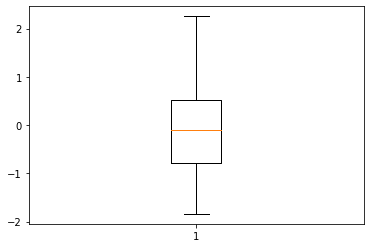

In [36]:
plt.boxplot(model_quad3.resid_pearson)

(array([1., 1., 5., 2., 5., 3., 1., 1., 1., 1.]),
 array([-1.83966835, -1.43014075, -1.02061315, -0.61108555, -0.20155795,
         0.20796966,  0.61749726,  1.02702486,  1.43655246,  1.84608006,
         2.25560766]),
 <a list of 10 Patch objects>)

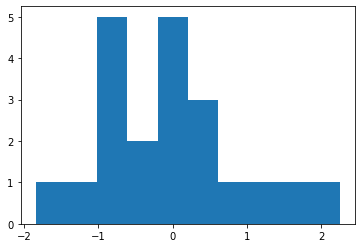

In [37]:
plt.hist(model_quad3.resid_pearson)

In [38]:
######## salary hike prediction using simple linear regression model########
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
x=pd.read_csv('Salary_Data.csv')
x

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [39]:
x.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [40]:
x.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [41]:
import seaborn as sns

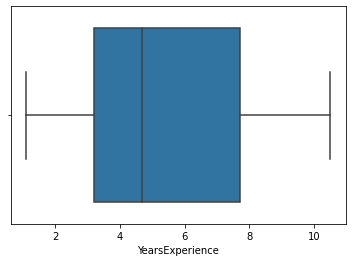

In [42]:
sns.boxplot(x.YearsExperience)

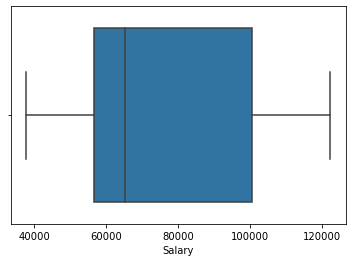

In [43]:
sns.boxplot(x.Salary)

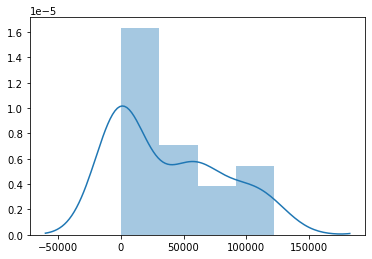

In [44]:
sns.distplot(x)

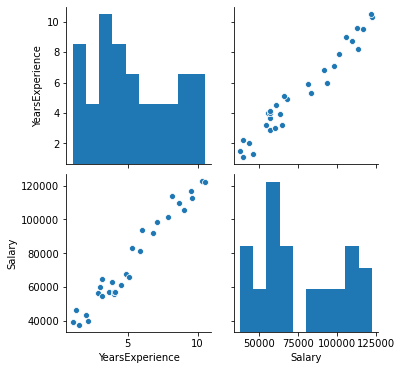

In [45]:
sns.pairplot(x)

In [46]:
x.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


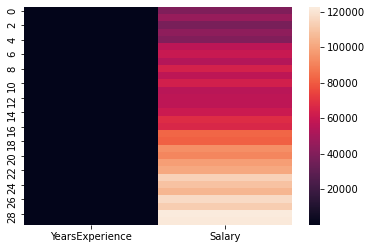

In [47]:
sns.heatmap(x)

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


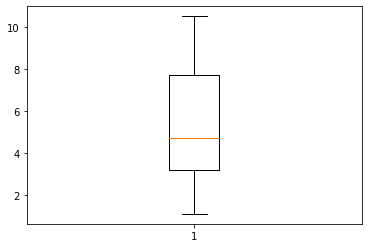

In [48]:
plt.boxplot(x.YearsExperience)
x.describe()

In [49]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=x).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        17:39:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=x).fit()
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [52]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           3.25e-13
Time:                        17:39:31   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model3 = smf.ols('np.log(YearsExperience)~Salary',data=x).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Tue, 05 Oct 2021   Prob (F-statistic):           3.25e-13
Time:                             17:39:45   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
x["YearsExperience_sq"] = x.YearsExperience*x.YearsExperience
x

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [55]:
model_quad3 = smf.ols("Salary~YearsExperience_sq",data=x).fit()
model_quad3.params

Intercept             48042.585515
YearsExperience_sq      776.318773
dtype: float64

In [56]:
model_quad3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.52e-16
Time:                        17:41:04   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
YearsExperience_sq   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad3.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,Rsquare
0,rmse_lin,0.956957
1,rmse_log,0.853889
2,rmse_exp,0.853889
3,rmse_quad,0.915320
